Create global map of ET from GLEAM 3.7b dataset (daily data for year 2021)

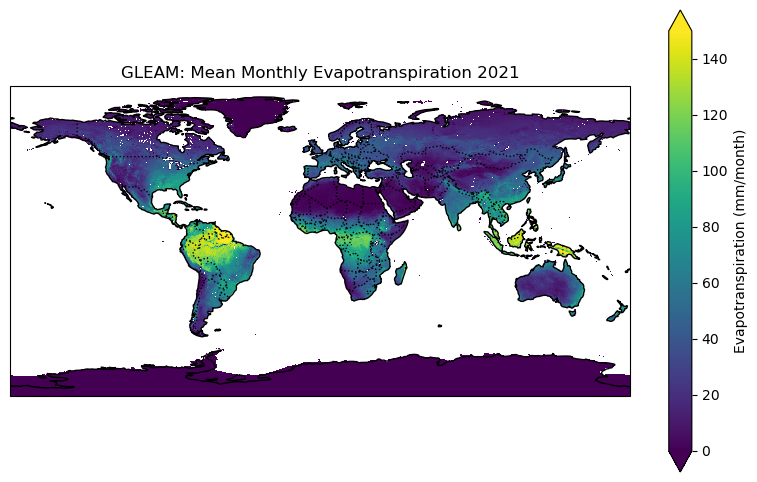

In [84]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set path to output files
path = 'C:/Users/annav/OneDrive/Desktop/Uni WiSe 23 24/Remote Sensing Data Products/ET Data GLEAM/'

file_transpiration = 'Et_2021_GLEAM_v3.7b.nc'
file_soil_evaporation = 'Eb_2021_GLEAM_v3.7b.nc'
file_interception_loss = 'Ei_2021_GLEAM_v3.7b.nc'

ds_transp = xr.open_dataset(os.path.join(path, file_transpiration))
ds_evap = xr.open_dataset(os.path.join(path, file_soil_evaporation))
ds_intercep = xr.open_dataset(os.path.join(path, file_interception_loss))

# Extract the 'Transpiration', 'SoilEvaporation' , 'Interception Loss' variables
transpiration = ds_transp['Et']
evaporation = ds_evap['Eb']
interception = ds_intercep['Ei']

# Calculate Evapotranspiration (ET = Transpiration + Soil Evaporation + Interception Loss)
evapotranspiration = transpiration + evaporation + interception

# mean over time and scale with *30 to receive monthly mean ET for the year 2021
et_2021 = evapotranspiration.mean(dim='time') * 30 

# Plot the map using pcolormesh
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
et_2021.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Evapotranspiration (mm/month)'}, vmin=0, vmax=150)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('GLEAM: Mean Monthly Evapotranspiration 2021')

plt.show()


Create european map of ET from GLEAM 3.7b dataset (daily data for year 2021)

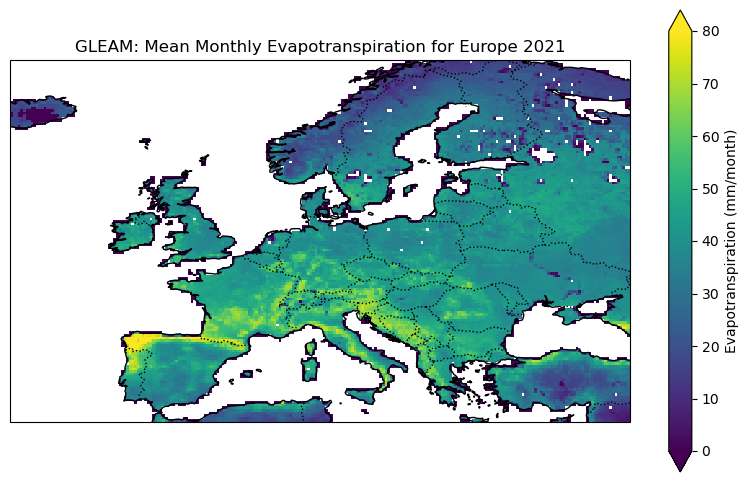

In [90]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set path to output files
path = 'C:/Users/annav/OneDrive/Desktop/Uni WiSe 23 24/Remote Sensing Data Products/ET Data GLEAM/'

# file_transpiration = 'Et_2003-2022_GLEAM_v3.7b_MO.nc'
# file_evaporation_soil = 'Eb_2003-2022_GLEAM_v3.7b_MO.nc'

file_transpiration = 'Et_2021_GLEAM_v3.7b.nc'
file_soil_evaporation = 'Eb_2021_GLEAM_v3.7b.nc'
file_interception_loss = 'Ei_2021_GLEAM_v3.7b.nc'

ds_transp = xr.open_dataset(os.path.join(path, file_transpiration))
ds_evap = xr.open_dataset(os.path.join(path, file_soil_evaporation))
ds_intercep = xr.open_dataset(os.path.join(path, file_interception_loss))

# Extract the 'Transpiration', 'SoilEvaporation' , 'Interception Loss' variables
transpiration = ds_transp['Et']
evaporation = ds_evap['Eb']
interception = ds_intercep['Ei']

# Calculate Evapotranspiration (ET = Transpiration + Soil Evaporation + Interception Loss)
evapotranspiration = transpiration + evaporation + interception

# mean over time and scale with *30 to receive monthly mean ET for the year 2021
et_2021 = evapotranspiration.mean(dim='time') * 30

# Plot the map using pcolormesh
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent to show only Europe
ax.set_extent([-20, 40, 35, 70], crs=ccrs.PlateCarree())

et_2021.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Evapotranspiration (mm/month)'}, vmin = 0, vmax = 80)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('GLEAM: Mean Monthly Evapotranspiration for Europe 2021')

plt.show()


Create global map of ET from FLUXCOM-X dataset (daily data for year 2021, unit mm/h)

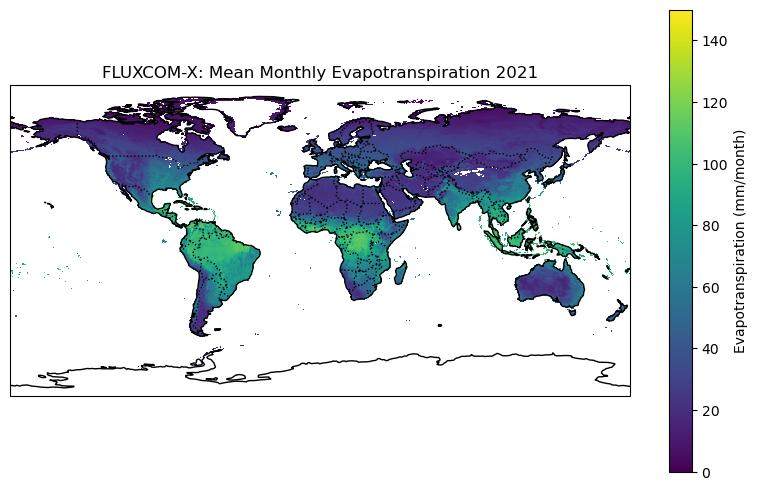

In [41]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set path to output files
path = 'C:/Users/annav/OneDrive/Desktop/Uni WiSe 23 24/Remote Sensing Data Products/ET Data GIF/'

# file = 'ET_2021_monthly_halfdeg.nc'
file = 'ET_2021_025_daily.nc'

ds_evapotran = xr.open_dataset(os.path.join(path, file))

# Extract the 'Transpiration' and 'SoilEvaporation' variables
evapotran = ds_evapotran['ET']

# Select data for the year 2020
et_2020 = evapotran.sel(time='2021').mean(dim='time') * 24 * 30

# Plot the map using pcolormesh
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
et_2020.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Evapotranspiration (mm/month)'}, vmin = 0, vmax = 80)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('FLUXCOM-X: Mean Monthly Evapotranspiration 2021')

plt.show()


Create european map of ET from FLUXCOM-X dataset (daily data for year 2021, unit mm/h)

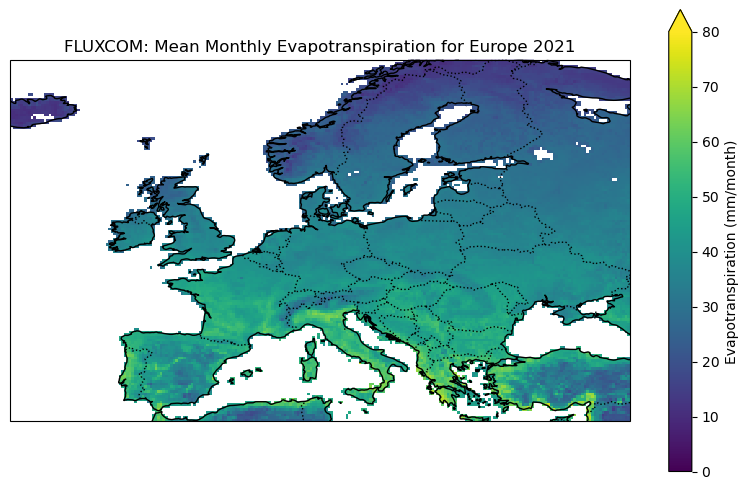

In [92]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set path to output files
path = 'C:/Users/annav/OneDrive/Desktop/Uni WiSe 23 24/Remote Sensing Data Products/ET Data GIF/'

file = 'ET_2021_025_daily.nc'

ds_evapotran = xr.open_dataset(os.path.join(path, file))

# Extract the 'Transpiration' and 'SoilEvaporation' variables
evapotran = ds_evapotran['ET']

# mean over time and scale with *24*30 to receive monthly mean ET for the year 2021
et_2021 = evapotran.mean(dim='time') * 24 * 30

# Plot the map using pcolormesh
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set the extent to show only Europe
ax.set_extent([-20, 40, 35, 70], crs=ccrs.PlateCarree())

et_2021.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Evapotranspiration (mm/month)'},vmin = 0, vmax = 80 )
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('FLUXCOM: Mean Monthly Evapotranspiration for Europe 2021')

plt.show()


Create GIF for Mean Monthly ET of every year from 2003 - 2023 from GLEAM 3.7b

In [115]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set path to output files
path = 'C:/Users/annav/OneDrive/Desktop/Uni WiSe 23 24/Remote Sensing Data Products/ET Data GLEAM/'

file_transpiration = 'Et_2003-2022_GLEAM_v3.7b_MO.nc'
file_soil_evaporation = 'Eb_2003-2022_GLEAM_v3.7b_MO.nc'
file_interception_loss = 'Ei_2003-2022_GLEAM_v3.7b_MO.nc'

# Define the years for which you want to create the GIF
years = range(2003, 2023)  # Adjust the range based on your dataset

ds_transp = xr.open_dataset(os.path.join(path, file_transpiration))
ds_evap = xr.open_dataset(os.path.join(path, file_soil_evaporation))
ds_intercep = xr.open_dataset(os.path.join(path, file_interception_loss))

# Extract the 'Transpiration' and 'SoilEvaporation' variables
transpiration = ds_transp['Et']
evaporation = ds_evap['Eb']
interception = ds_intercep['Ei']

frames = []  # List to store frame paths for GIF creation

for year in years:
    # Calculate Evapotranspiration (ET) for Europe
    evapotranspiration = transpiration.sel(time=str(year)) + evaporation.sel(time=str(year)) + interception.sel(time=str(year)) 

    # Calculate the mean monthly ET
    mean_et = evapotranspiration.mean(dim='time')

    # Plot the map using pcolormesh (optional)
    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    # Set the extent to show only Europe
    ax.set_extent([-20, 40, 35, 70], crs=ccrs.PlateCarree())
    mean_et.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Evapotranspiration (mm/month)'}, vmin=0, vmax=80)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_title(f'GLEAM: Mean Monthly Evapotranspiration {year}')

    # Save the plot as an image
    frame_path = f'Mean_ET_{year}.png'
    plt.savefig(frame_path)
    frames.append(frame_path)
    plt.close()

# Create a GIF from the frames
output_gif_path = 'Mean_Monthly_ET_GLEAM.gif'
imageio.mimsave(output_gif_path, [imageio.imread(frame) for frame in frames], duration=1)

# Display the GIF path
print(f'GIF saved at: {output_gif_path}')


C:\Users\annav\AppData\Local\Temp\ipykernel_5060\811240472.py:55: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  imageio.mimsave(output_gif_path, [imageio.imread(frame) for frame in frames], duration=1)


GIF saved at: Mean_Monthly_ET_GLEAM.gif
